#Starting with OpenCV
##Read and show an image
To read and show images you can use both `Matplotlib` or `OpenCv` (`cv2`).
First of all, you need to import these libraries:

In [15]:
import cv2
# The cv2 package is OpenCV and despite the 2 embedded,
# it can actually be OpenCV 3 or OpenCV 4.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg



To read and show an image using `Matplotlib`:

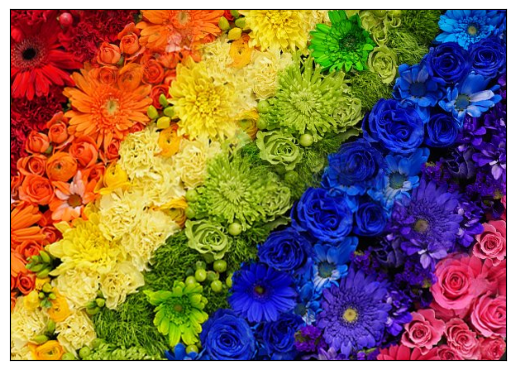

In [16]:
img=mpimg.imread('flowers.jpg')
imgplot = plt.imshow(img)
plt.show(plt.xticks([]), plt.yticks([])) #removes header

To read and show an image using `OpenCV`:



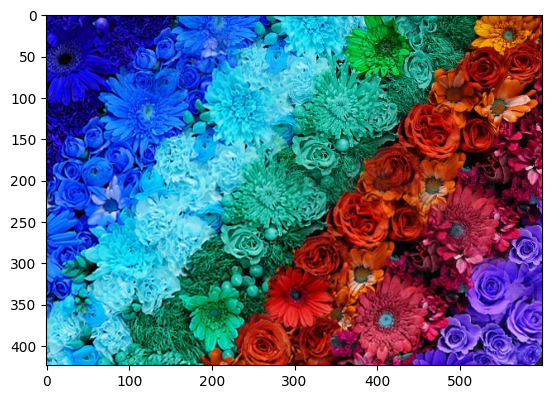

In [17]:
img = cv2.imread('flowers.jpg')
#cv2.imshow(img)
#cv2.imshow() is disabled in Colab, because it causes Jupyter sessions to crash;
plt.imshow(img)
plt.show()

You can notice that the same image is visualized with different colors when using `OpenCV` to read the image. This is because the default setting of the color mode in `OpenCV` comes in the order of **BGR**, which is different from that of `Matplotlib` that is **RGB**. This is because when OpenCV was first being developed many years ago the standard was BGR ordering. Over the years, the standard has now become RGB but `OpenCV` still maintains this “legacy” BGR ordering to ensure no existing code breaks.
Therefore to see the image in RGB mode, we need to convert it from BGR to RGB as follows:

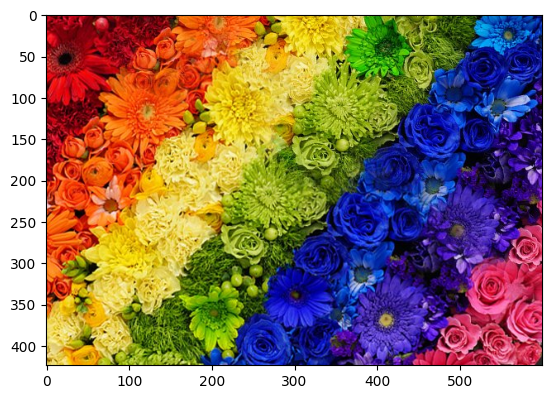

In [18]:
# Convert the image into RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

The image is represented as a a multi-dimensional `NumPy` array with no. rows (height) x no. columns (width) x no. channels (depth). So the dimensions of the image are actually represented as (height, width, depth).
Depth is the number of channels — in our case this is 3 since we’re working with 3 color channels: Blue, Green, and Red.

In [19]:
# Let's show the image dimensions
(h, w, d) = img.shape
print("width={}, height={}, depth={}".format(w, h, d))

width=600, height=424, depth=3


Now let's see how to RESIZE (scaling) the images, which is a useful operation to reduce memory storage:

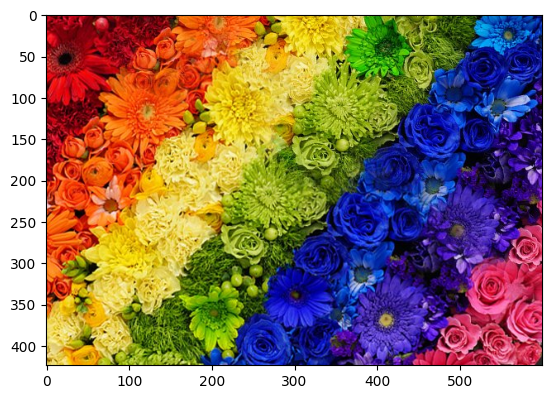

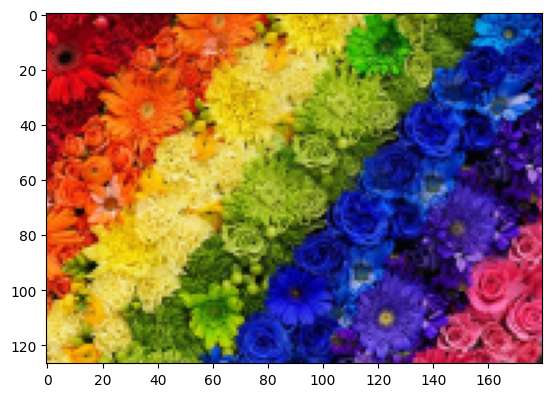

In [20]:
scale=0.3
width=int(img.shape[1]*scale)
height=int(img.shape[0]*scale)
dimensions=(width, height)
#let's change the size
img_resized=cv2.resize(img,dimensions,interpolation=cv2.INTER_AREA)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

Resizing images is important for a number of reasons. First, you might want to resize a large image to fit on your screen. Image processing is also faster on smaller images because there are fewer pixels to process. In the case of deep learning, we often resize images, ignoring aspect ratio, so that the volume fits into a network which requires that an image be square and of a certain dimension.

Let’s resize our original image to 200 x 200 pixels:

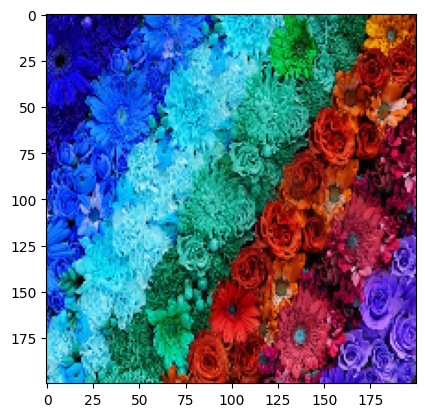

In [21]:
# resize the image to 200x200px, ignoring aspect ratio
resized = cv2.resize(img, (200, 200))
plt.imshow(resized)
plt.show()

# Changing Color space
There are more than 150 color-space conversion methods available in OpenCV. But we will look into only a few. First conversion is BGR to Gray

# Converting in grayscale
Each pixel in a grayscale image has a value representing the shade of gray. In `OpenCV`, there are 256 shades of gray — from 0 to 255. So a grayscale image would have a grayscale value associated with each pixel. To see the image in grayscale, we need to convert the color mode into gray.

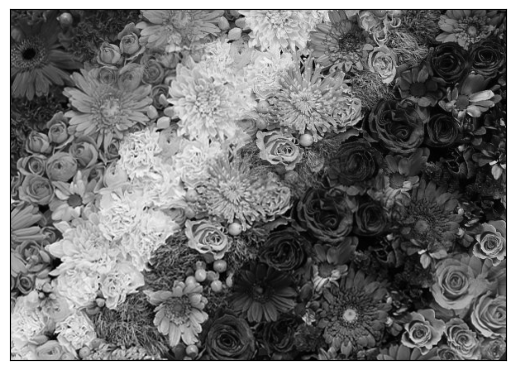

In [22]:
# Convert the image into gray scale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap = 'gray')
plt.show(plt.xticks([]), plt.yticks([]))

# Showing the RGB channels
Each value in the RGB (or BGR) 3-tuple has a range of $[0, 255]$ . How many color possibilities are there for each pixel in an RGB image in OpenCV? That’s easy: $256 * 256 * 256 = 16777216$.
We can access individual pixel values in the array by specifying the coordinates so long as they are within the max width and height.

The code below yields a 3-tuple of BGR values from the pixel located at x=50 and y=100 (again, keep in mind that the height is the number of rows and the width is the number of columns).

In [23]:
(B, G, R) = img[10, 100]
print("R={}, G={}, B={}".format(R, G, B))

R=121, G=15, B=17


Actually, RGB images are made up by stacking three channels: Red, Green, and Blue. We can take each channel and depict it separately.

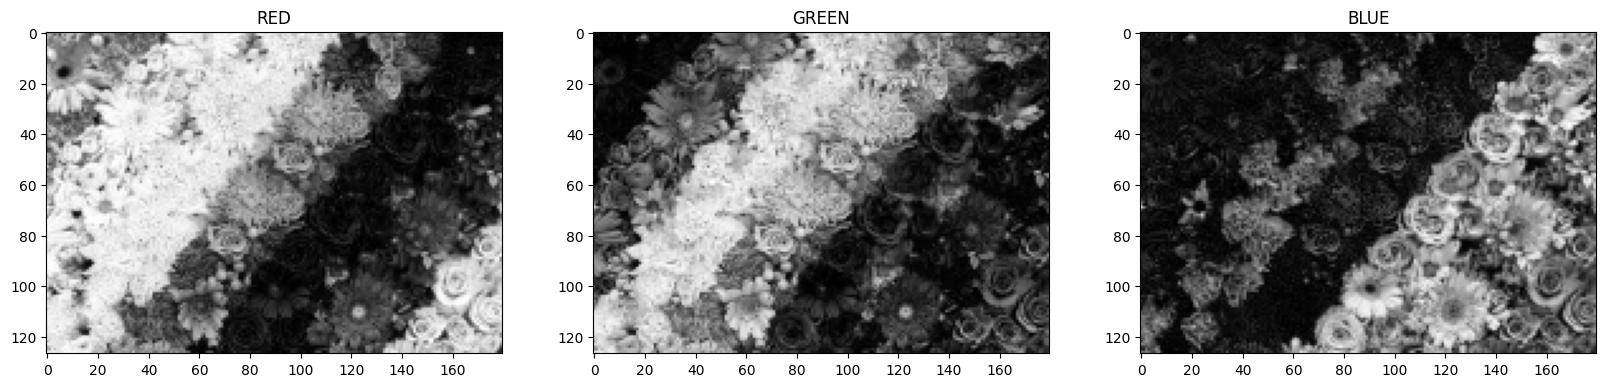

In [24]:
# Plot the three channels of the image
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 20))
for i in range(0, 3):
    ax = axs[i]
    ax.imshow(img_rgb[:, :, i], cmap = 'gray')
axs[0].set_title('RED')
axs[1].set_title('GREEN')
axs[2].set_title('BLUE')
plt.show()

Take a look at the images above. The three images show you how each channel is composed of. In the RED channel picture, the part with the high saturation of red colors looks white. Why is that? This is because the values in the red color parts will be near 255. And in grayscale mode, the higher the value is, the whiter the color becomes. You can also check this with GREEN or BLUE channels and compare how certain parts differ one from another.

In [ ]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 20))

axs[0].imshow(img_rgb[:, :, 0], cmap = 'Reds')
axs[0].set_title('RED')

axs[1].imshow(img_rgb[:, :, 1], cmap = 'Greens')
axs[1].set_title('GREEN')

axs[2].imshow(img_rgb[:, :, 2], cmap = 'Blues')
axs[2].set_title('BLUE')

plt.show()

# Converting to HSV
The HSV and HLS color spaces take a bit different aspect from RGB color space.
HSV stands for hue, saturation and value.
In HSV, hue is a color tone, saturation is the intensity of a color, and value represents its darkness (or brightness at the opposite end of the spectrum).
HSL stands for hue, saturation and lightness.

<img src="https://upload.wikimedia.org/wikipedia/commons/4/4e/HSV_color_solid_cylinder.png"
         alt="HSV"  width="200">     
As you can see from the figure, they still have a three-dimensional representation, but it’s more similar to the way of human perception. The center axis for HSV is the value (intensity) of colors while that for HSL is the amount of light. Along the angles from the center axis, there is hue, the actual colors. And the distance from the center axis belongs to saturation. Transforming the color mode can be done as follows.

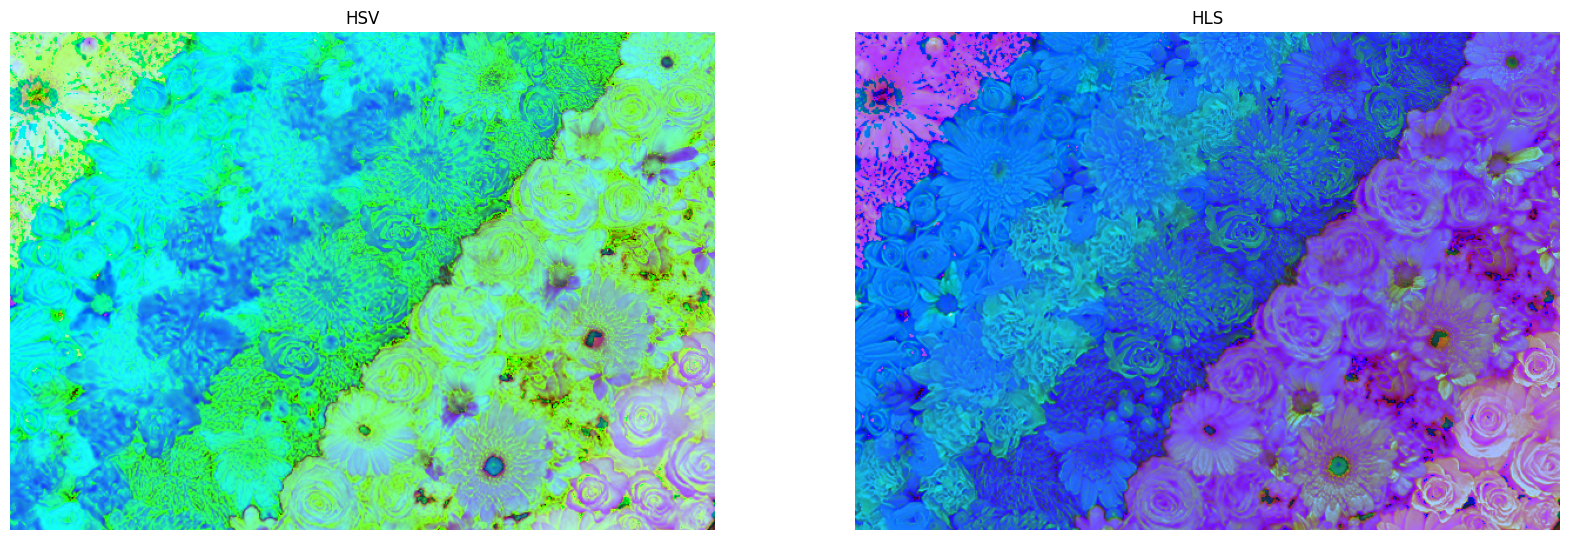

In [25]:
# Transform the image into HSV and HLS models
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
# Plot the converted images
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 20))
ax1.imshow(img_hsv)
ax1.set_title('HSV')
ax1.set_axis_off()
ax2.imshow(img_hls)
ax2.set_title('HLS')
ax2.set_axis_off()
plt.show()


#Converting to L*a*b

In [ ]:
# Transform the image into Lab model
img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)
# Plot the converted images
plt.imshow(img_lab)
plt.show(plt.xticks([]), plt.yticks([]))
plt.show()


# Accessing and Manipulating Pixels

In [26]:
flower_image=cv2.imread("flowers.jpg")
img_rgb = cv2.cvtColor(flower_image, cv2.COLOR_BGR2RGB)
#access a specific pixel using the coordinate based access from the matrix
pixel=flower_image[200,250]
#see the pixel components in the color space - this is an RBG representation
print(pixel)

[ 20 182 156]


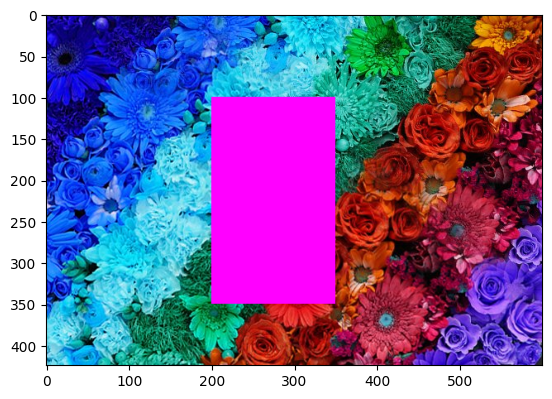

In [27]:

#lets change the pixel color value to red in a region range
flower_image[100:350,200:350]=(255,0,255)
plt.imshow(flower_image)
plt.show()